# Pytroch 学习

## 1 Numpy and Torch对比

## 2 变量(Variable)|

In [1]:
import torch
from torch.autograd import Variable  #torch 中Variable模块

In [4]:
tensor = torch.FloatTensor([[1,2],[3,4]])
variable = Variable(tensor,requires_grad=True)
print(tensor)
print(variable)

tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]], requires_grad=True)


### Variable计算，梯度

In [6]:
t_out = torch.mean(tensor*tensor) 
v_out = torch.mean(variable*variable)
print(t_out)
print(v_out)

tensor(7.5000)
tensor(7.5000, grad_fn=<MeanBackward1>)


#  多层全连接神经网络

## PyTorch基础

In [2]:
import torch
from torch.autograd import Variable  #torch 中Variable模块

In [3]:
a = torch.Tensor([[2,3],[4,8],[7,9]])
print('a is:{}'.format(a))

a is:tensor([[2., 3.],
        [4., 8.],
        [7., 9.]])


In [4]:
print('a size is {}'.format(a.size()))

a size is torch.Size([3, 2])


In [5]:
b = torch.LongTensor([[2,3],[4,8],[7,9]])
print('b is :{}'.format(b))

b is :tensor([[2, 3],
        [4, 8],
        [7, 9]])


创建一个全0的空Tensor或者取一个正态分布作为随机初始值

In [6]:
c = torch.zeros((3,2))
print('zero tensor:{}'.format(c))

zero tensor:tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


In [7]:
d = torch.randn((3,2))
print('normal randon is :{}'.format(d))

normal randon is :tensor([[ 0.7549,  0.1413],
        [-0.6527,  0.1460],
        [-0.2370,  0.4122]])


采用索引的方式取出其中的元素，同时改变它的值

In [8]:
a[0,1]=100
print('changed a is:{}'.format(a))

changed a is:tensor([[  2., 100.],
        [  4.,   8.],
        [  7.,   9.]])


In [11]:
numpy_b = b.numpy()
print('convert to numpy is \n{}'.format(numpy_b))

convert to numpy is 
[[2 3]
 [4 8]
 [7 9]]


In [12]:
import numpy as np
e = np.array([[2,3],[4,5]])
torch_e = torch.from_numpy(e)
print('from numpy to torch.Tensor is {}'.format(torch_e))

from numpy to torch.Tensor is tensor([[2, 3],
        [4, 5]], dtype=torch.int32)


In [14]:
f_torch_e = torch_e.float()
print('change data type to float tensor:{}'.format(f_torch_e))

change data type to float tensor:tensor([[2., 3.],
        [4., 5.]])


### Variable(变量)

Variable和Tensor本质上没有区别，不过Variable会被放入一个计算图中，然后进行前向传播，反向传播，自动求导

In [16]:
# Create Variable
x = Variable(torch.Tensor([1]),requires_grad=True)
w = Variable(torch.Tensor([2]),requires_grad=True)
b = Variable(torch.Tensor([3]),requires_grad=True)


# Build a computational graph
y = w*x+b

# Compute gradients
y.backward()  # same as y.backward(torch.FloatTensor([1]))
# Print out the gradients
print(x.grad)   # x.grad = 2
print(w.grad)   # w.grad = 1
print(b.grad)

tensor([2.])
tensor([1.])
tensor([1.])


注意： 构建Variable，要注意得传入一个参数requires_grad=True,这个参数表示是否对这个变量求梯度，默认是False，也就是不对这个变量求梯度

In [17]:
x = torch.randn(3)
x = Variable(x,requires_grad=True)

y = x*2
print(y)

y.backward(torch.FloatTensor([1,0.1,0.01]))
print(x.grad)

tensor([-1.4653,  2.4078, -0.6414], grad_fn=<MulBackward0>)
tensor([2.0000, 0.2000, 0.0200])


### Dataset(数据集)

处理任何机器学习问题之前需要数据读取，并进行预处理

torch.utils.data.Dataset是代表这一数据的抽象类，可以自己定义数据类继承和重写这个抽象类，只需要定义__len__和__getitem__这两个函数

In [ ]:
import pandas as pd


In [ ]:
class myDataset(Dataset):
    def __init__(self,csv_file,txt_file,root_dir,other_file):
        self.csv_data = pd.read_csv(csv_file)
        with open(txt_file,'r') as f:
            data_list = f.readlines()
        self.txt_data = data_list
        self.root_dir = root_dir
        
    def __len__(self):
        return len(self.csv_data)
    def __getitem__(self,idx):
        data = (self.csv_data[idx],self.txt_data[idx])
        return data

* <font color=red size=4>重点关注torch.utils.data.DataLoader</font>

* <font color=red size=4>重点关注torchvision:ImageFolder</font>

### nn.Module(模组)

<font size=3>在PyTorch里面编写神经网络，所有的层结构和损失函数都来自于torch.nn，所有的模型都是从这个基类nn.Module继承的</font>

In [ ]:
class net_name(nn.Module):
    def __init__(self,other_arguments):
        super(net_name,self).__init__()
        self.conv1 = nn.Conv2d(in_channels,out_channels,kernel_size)
        # other network layer
        
    def forward(self,x):
        x = self.conv1(x)
        return x
        

<font size=3>上述建立了一个计算图，并且这个结构可以复用多次，每次调用就相当于用该计算图定义的相同参数做一次前向传播，这得益于Pytroch的自动求导功能，所以我们不需要自己编写反向传播，而所有的网络层都是由nn这个包得到的，比如线性层nn.Linear</font>

<font size=3>定义完模型，就tongguonn这个包来定义损失函数，常见的损失函数已经定义在nn中，比如均方误差、多分类的交叉熵，以及二分类的交叉熵等</font>
* criterion = nn.CrossEntropyLoss()
* loss = criterion(output,target)

### torch.optim(优化)

### 模型的保存和加载

<font size=3>在PyTorch里面使用torch.save来保存模型的结构和参数，有两种保存方式</font>

* 保存真个模型的结构信息和参数信息，保存的对象是模型model;
* 保存模型的参数，保存的对象是模型的状态model.state_dict()

1. torch.save(model,'.model.pth')
2. torch.save(model.sate_dict(),'./model_state.pth')

## 线性模型

### 一维线性回归及其代码实现

In [18]:
import matplotlib.pylab as plt

* 数据点

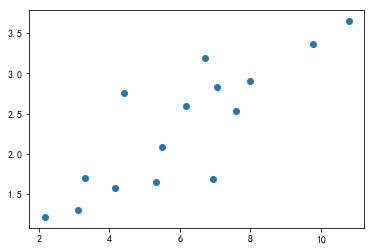

In [21]:
x_train = np.array([[3.3],[4.4],[5.5],[6.71],[6.93],[4.168],
                    [9.779],[6.182],[7.59],[2.167],[7.042],
                    [10.791],[5.313],[7.997],[3.1]],dtype=np.float32)

y_train = np.array([[1.7],[2.76],[2.09],[3.19],[1.694],[1.573],
                    [3.366],[2.596],[2.53],[1.221],[2.827],
                    [3.645],[1.65],[2.904],[1.3]],dtype=np.float32)

plt.scatter(x_train,y_train)
plt.show()

In [22]:
# 先将numpy.aray转换为Tensor
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

* 定义简单的模型

In [26]:
import torch.nn as nn
import torch
from torch.autograd import Variable

class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression,self).__init__()
        self.linear = nn.Linear(1,1)
        
    def forward(self,x):
        out = self.linear(x)
        return out
    
if torch.cuda.is_available():
    model = LinearRegression().cuda
else:
    model = LinearRegression()
        

In [31]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=1e-3)

In [37]:

num_epochs = 1000
for epoch in range(num_epochs):
    if torch.cuda.is_available():
        inputs = Variable(x_train).cuda()
        target = Variable(y_train).cuda()
    else:
        inputs = Variable(x_train)
        target = Variable(y_train)
        
    # forward
    out = model(inputs)
    loss = criterion(out,target)

    # Backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if(epoch+1)%20 == 0:
        print('Epoch[{}/{}], loss:{:.6f}'.format(epoch+1,num_epochs,loss.item()))


Epoch[20/1000], loss:0.236325
Epoch[40/1000], loss:0.235629
Epoch[60/1000], loss:0.234940
Epoch[80/1000], loss:0.234258
Epoch[100/1000], loss:0.233583
Epoch[120/1000], loss:0.232915
Epoch[140/1000], loss:0.232254
Epoch[160/1000], loss:0.231600
Epoch[180/1000], loss:0.230952
Epoch[200/1000], loss:0.230311
Epoch[220/1000], loss:0.229677
Epoch[240/1000], loss:0.229049
Epoch[260/1000], loss:0.228427
Epoch[280/1000], loss:0.227812
Epoch[300/1000], loss:0.227203
Epoch[320/1000], loss:0.226600
Epoch[340/1000], loss:0.226003
Epoch[360/1000], loss:0.225413
Epoch[380/1000], loss:0.224828
Epoch[400/1000], loss:0.224250
Epoch[420/1000], loss:0.223677
Epoch[440/1000], loss:0.223111
Epoch[460/1000], loss:0.222550
Epoch[480/1000], loss:0.221994
Epoch[500/1000], loss:0.221445
Epoch[520/1000], loss:0.220901
Epoch[540/1000], loss:0.220363
Epoch[560/1000], loss:0.219830
Epoch[580/1000], loss:0.219303
Epoch[600/1000], loss:0.218781
Epoch[620/1000], loss:0.218264
Epoch[640/1000], loss:0.217752
Epoch[660/10

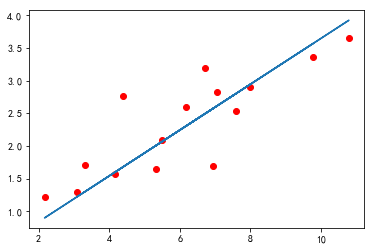

In [38]:
model.eval()   #将模型变为测试模型，这是因为有一些层操作，比如Dropout和BatchNormalization在训练和测试的时候是不一样的，所以需要我们通过这样一个操作来转换这些不一样的层操作
predict = model(Variable(x_train))
predict = predict.data.numpy()
plt.plot(x_train.numpy(),y_train.numpy(),'ro',label='Original data')
plt.plot(x_train.numpy(),predict,label='Fitting Line')
plt.show()

### 多项式回归

* 数据预处理，将数据变成一个矩阵的形式

In [39]:
# PyTroch里面使用torch.cat()函数实现Tensor的拼接
def make_features(x):
    x = x.unsqueeze(1)
    return torch.cat([x**i for i in range(1,4)],1)

In [40]:
W_target = torch.FloatTensor([0.5,3,2.4]).unsqueeze(1)
b_target = torch.FloatTensor([0.9])

def f(x):
    """Approximated function"""
    return x.mm(W_target)+b_target[0]

* 随机生成一些数来得到每次的训练集

In [41]:
def get_batch(batch_size=32):
    """Builds a batch i.e. (x,f(x)) pair"""
    random = torch.randn(batch_size)
    x = make_features(random)
    y = f(x)
    if torch.cuda.is_available():
        return Variable(x).cuda(),Variable(y).cuda()
    else:
        return Variable(x),Variable(y)

* 定义多项式模型

In [43]:
# Define model
class poly_model(nn.Module):
    def __init__(self):
        super(poly_model,self).__init__()
        self.poly = nn.Linear(3,1)
        
    def forward(self,x):
        out = self.poly(x)
        return out
    
if torch.cuda.is_available():
    model = poly_model().cuda()
else:
    model = poly_model()

* 定义损失函数和优化器

In [44]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=1e-3)

* 开始训练模型

In [50]:
epoch = 0
while True:
    # Get data
    batch_x, batch_y = get_batch()
    
    # Forward pass
    output = model(batch_x)
    loss = criterion(output,batch_y)
    print_loss = loss.item()
    
    #Reset gradients
    optimizer.zero_grad()
    #Backward pass
    loss.backward()
    # update parameters
    optimizer.step()
    epoch +=1
    if print_loss<1e-3:
        break

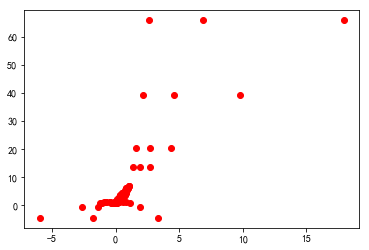

In [51]:
batch_x,batch_y = get_batch()
# model.eval()
# predict = model(batch_x)
# predict = predict.data.numpy()
plt.plot(batch_x.numpy(),batch_y.numpy(),'ro',label='real curve')
# plt.plot(batch_x,predict,label='fitting curve')
plt.show()

## 分类问题

### Logitic逻辑回归问题

* Sigmoid函数的近似形式

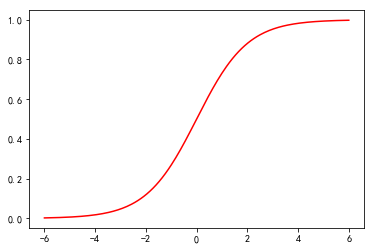

In [53]:
x_data = np.linspace(-6,6,200)
y_data = 1/(1+np.exp(-x_data))
plt.plot(x_data,y_data,'r',label='Sigmoid funcion')
plt.show()

* 代码实现